# Intestinal organoid

In [1]:
import math
import scanpy as sc
import scvelo as scv
import matplotlib.pyplot as plt

import sys
sys.path.append("..")
from tivelo.main import tivelo
from baseline import run_baseline

(Running UniTVelo 0.2.5.2)
2025-04-05 05:02:40


2025-04-05 13:02:41.088963: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Run TIVelo
Load the dataset. Set the data name with key for cluster, key for embedding and cluster edges (for comparison).

In [2]:
data_name = "organoid"
data_path = "/lustre/project/Stat/s1155184322/datasets/velocity/organoids_processed.h5ad"
adata = sc.read(data_path)

group_key = "cell_type"
emb_key = "X_umap"
cluster_edges = [("Stem cells", "TA cells"), ("Stem cells", "Goblet cells")]

Let the .var_names of adata be the name of genes.

In [3]:
adata.var_names = adata.var["gene"]

Set the model parameters.

In [4]:
save_folder = "results"
show_fig = True
filter_genes = True
save_coeff = True
constrain = True
loss_fun = "mse"
only_s = False
alpha_1 = 1
alpha_2 = 0.1
batch_size = 1024
n_epochs = 100

tree_gene = "Gcnt4"
show_DTI = False
adjust_DTI = False
velocity_key = "velocity"
measure_performance = True

Run the model by function tivelo.

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 20/20 cores)


  0%|          | 0/3831 [00:00<?, ?cells/s]

    finished (0:00:18) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 4 regions of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
'path_dict' added to adata.uns


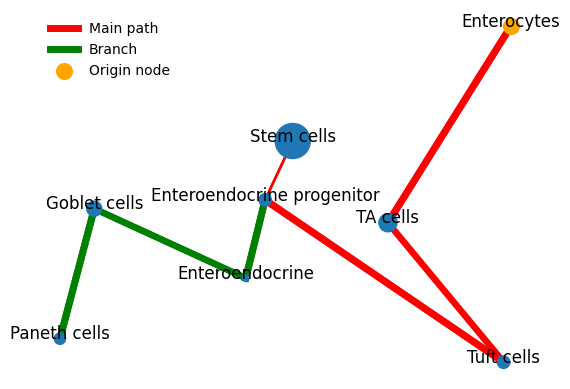


main path: ['Enterocytes', 'TA cells', 'Tuft cells', 'Enteroendocrine progenitor', 'Stem cells']


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done  73 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 181 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done 225 tasks      | elapsed:  

mean: -0.650 
median: 0.876 
lower quantile: -10.391 
upper quantile: 9.711 
minimum: -199.481 
maximum: 188.478 
No. of positive scores: 221

branch_1: ['Enteroendocrine progenitor', 'Enteroendocrine', 'Goblet cells', 'Paneth cells']
mean: -0.000 
median: 0.000 
lower quantile: -0.000 
upper quantile: 0.000 
minimum: -0.000 
maximum: 0.000 
No. of positive scores: 126

'path_dict' added to adata.uns


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.004162311553955078s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.019179821014404297s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 106 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.018293380737304688s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 220 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 279 tasks      | elapsed:    0.0s
[Parallel(n_

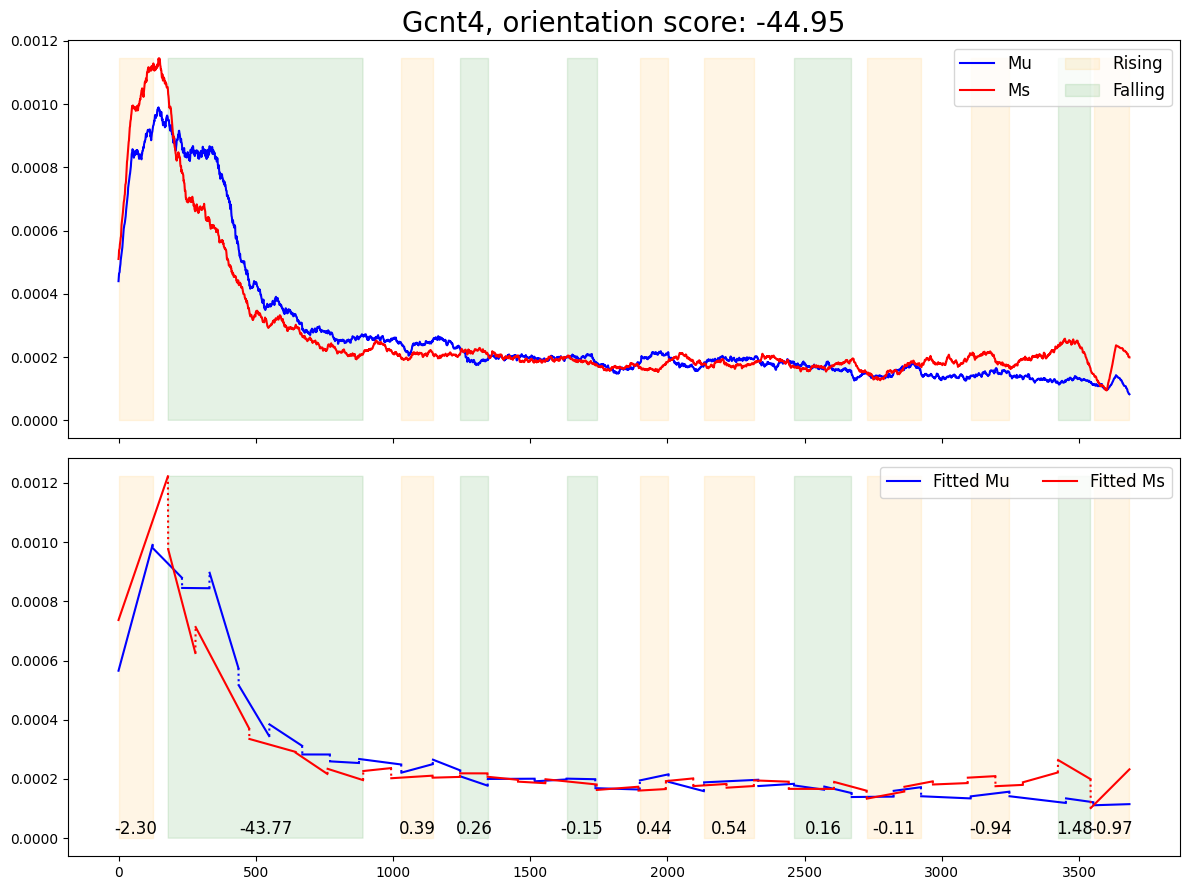

'child_dict' added to adata.uns
'level_dict' added to adata.uns
'threshold_list' added to adata.uns
'd_nn' added to adata.obsp


Model training: 100%|██████████| 100/100 [00:18<00:00,  5.45it/s, cos_s=0.647, cos_u=0.928, mse_s=0.009, mse_u=0.006]


computing velocity graph (using 20/20 cores)


  0%|          | 0/3831 [00:00<?, ?cells/s]

    finished (0:00:04) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


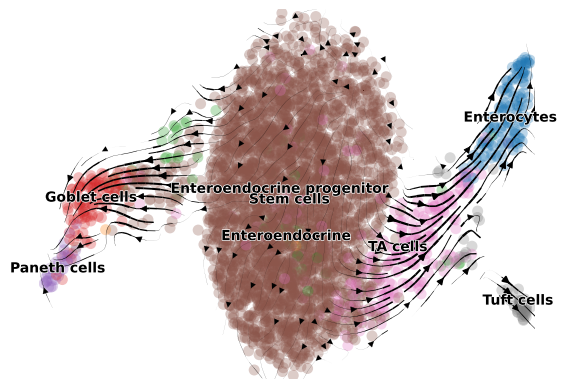

TIVelo:
 CBDir: 0.4669 ICVCoh: 0.6073 
 CBDir2: 0.4238 ICVCoh2: 0.5058 
 TransProbs: 0.3538 VeloCoh: 0.3890


In [5]:
adata_ = tivelo(adata, group_key, emb_key, data_name=data_name, save_folder=save_folder, njobs=-1, tree_gene=tree_gene,
                show_fig=show_fig, filter_genes=filter_genes, constrain=constrain, loss_fun=loss_fun, only_s=only_s,
                alpha_1=alpha_1, alpha_2=alpha_2, batch_size=batch_size, n_epochs=n_epochs, velocity_key="velocity",
                adjust_DTI=adjust_DTI, show_DTI=show_DTI, cluster_edges=cluster_edges,
                measure_performance=measure_performance)

Generate the scatter $u$-$s$ plot for single genes.

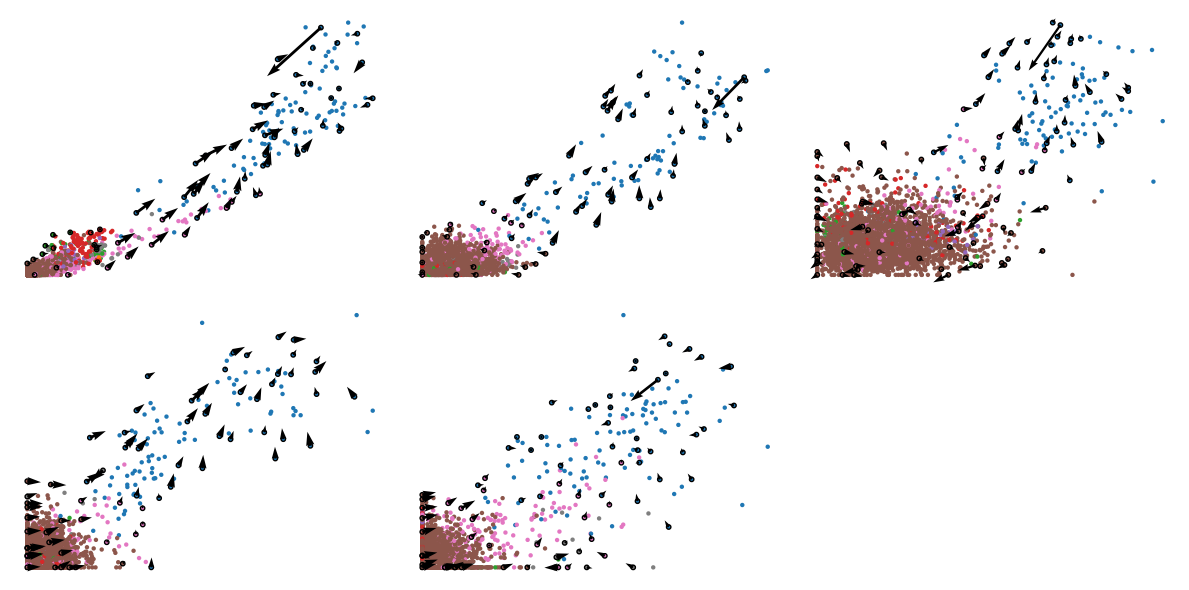

In [6]:
ncols = 3
gene_list = ["Ndrg1", "Dhrs1", 'Gramd3', "Cdr2", "Slc7a9"]
scale_list = [5, 5, 2, 2, 2]
height = math.ceil(len(gene_list) / ncols) * 3
fig = plt.figure(figsize=(4 * ncols, height))

for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list) / ncols), ncols, i + 1)
    scatter_gene(adata_, velocity_key="velocity", gene_name=gene_list[i], ax=ax, color=group_key,
                 key_cluster="Granule mature", length_scale=scale_list[i])
    ax.axis('off')

fig.tight_layout()
plt.savefig(save_folder + "/{}/figs/scatter_genes.png".format(data_name))

## Run scVelo
Stochastic mode.

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


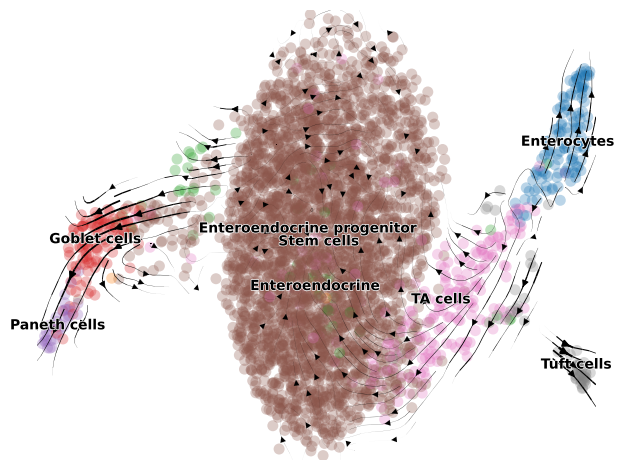

scvelo:
 CBDir: 0.0487 ICVCoh: 0.8776 
 CBDir2: 0.0453 ICVCoh2: 0.5800 
 TransProbs: 0.0859 VeloCoh: 0.0581


In [7]:
adata_scvelo = run_baseline(adata, "scvelo", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                            measure_performance=True)

Dynamical mode.

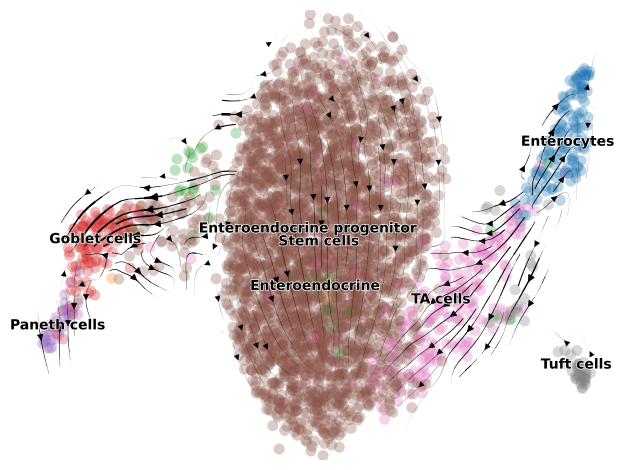

scvelo2:
 CBDir: 0.0812 ICVCoh: 0.8051 
 CBDir2: 0.0850 ICVCoh2: 0.5672 
 TransProbs: 0.1826 VeloCoh: 0.0041


In [8]:
adata_scvelo2 = run_baseline(adata, "scvelo2", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                            measure_performance=True)

## Run veloVI.

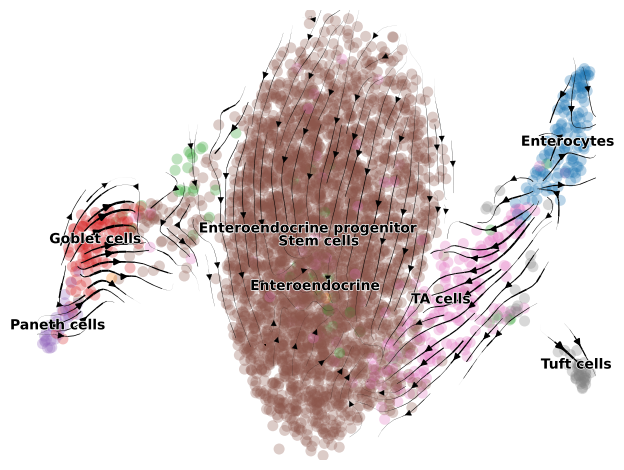

velovi:
 CBDir: 0.0613 ICVCoh: 0.8673 
 CBDir2: 0.0781 ICVCoh2: 0.5816 
 TransProbs: 0.0647 VeloCoh: 0.1207


In [9]:
adata_velovi = run_baseline(adata, "velovi", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                            measure_performance=True)

## Run UniTVelo.

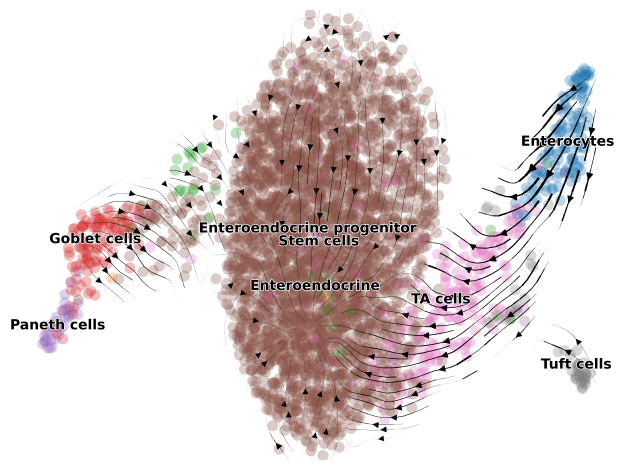

unitvelo:
 CBDir: -0.4437 ICVCoh: 0.9748 
 CBDir2: -0.1791 ICVCoh2: 0.6658 
 TransProbs: 0.0259 VeloCoh: -0.1716


In [10]:
adata_unitvelo = run_baseline(adata, "unitvelo", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                              measure_performance=True)

## Run cellDancer

We don't directly run cellDancer here since the environment required by cellDancer may conflict that of TIVelo. We recommend running cellDancer in an independent environment.

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_S_umap', embedded velocity vectors (adata.obsm)


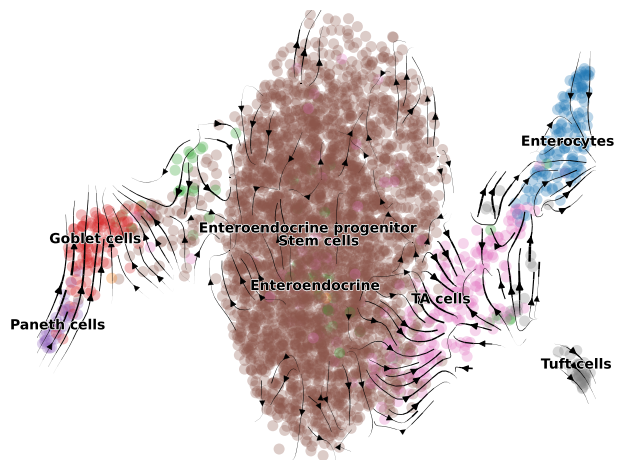

celldancer:
 CBDir: 0.2645 ICVCoh: 0.9125 
 CBDir2: 0.0984 ICVCoh2: 0.4553 
 TransProbs: 0.0546 VeloCoh: -0.1559


In [11]:
adata_celldancer = run_baseline(adata, "celldancer", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                                measure_performance=True)

## Run DeepVelo

We don't directly run DeepVelo here since the environment required by DeepVelo may conflict that of TIVelo. We recommend running DeepVelo in an independent environment.

In [3]:
adata_deepvelo = sc.read("/users/s1155184322/projects/tutorial/DeepVelo/results/organoid_deepvelo_default.h5ad")
velocity_key = "velocity"

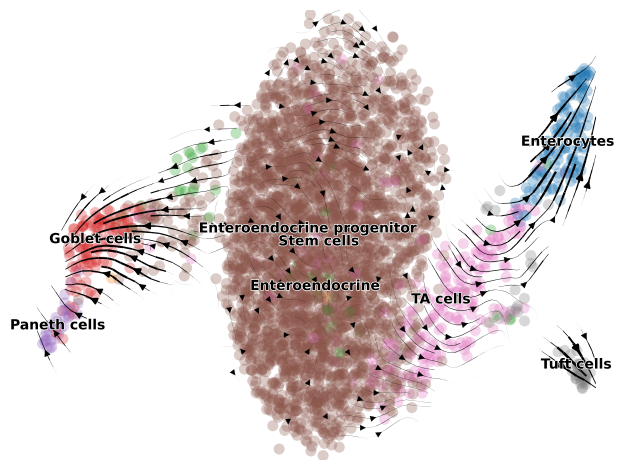

In [4]:
ax = scv.pl.velocity_embedding_stream(adata_deepvelo, vkey=velocity_key, color=group_key, title="", show=False)
plt.tight_layout()

In [4]:
from tivelo.utils.metrics import inner_cluster_coh, cross_boundary_correctness, cross_boundary_scvelo_probs, \
    cross_boundary_correctness2, inner_cluster_coh2, velo_coh
    
_, cbdir = cross_boundary_correctness(adata_deepvelo, cluster_key=group_key, velocity_key=velocity_key,
                                                  cluster_edges=cluster_edges, x_emb=emb_key)
_, cbdir2 = cross_boundary_correctness2(adata_deepvelo, cluster_key=group_key, velocity_key=velocity_key,
                                                    cluster_edges=cluster_edges)
_, trans_probs = cross_boundary_scvelo_probs(adata_deepvelo, cluster_key=group_key, cluster_edges=cluster_edges,
                                                         trans_g_key="{}_graph".format(velocity_key))
_, icvcoh = inner_cluster_coh(adata_deepvelo, cluster_key=group_key, velocity_key=velocity_key)
_, icvcoh2 = inner_cluster_coh2(adata_deepvelo, cluster_key=group_key, velocity_key=velocity_key, x_emb=emb_key)
velocoh = velo_coh(adata_deepvelo, velocity_key=velocity_key, trans_g_key="{}_graph".format(velocity_key))

print("DeepVelo:\n", "CBDir:", "%.4f" % cbdir, "ICVCoh:", "%.4f" % icvcoh, "\n",
      "CBDir2:", "%.4f" % cbdir2, "ICVCoh2:", "%.4f" % icvcoh2, "\n",
      "TransProbs:", "%.4f" % trans_probs, "VeloCoh:", "%.4f" % velocoh)

DeepVelo:
 CBDir: 0.5957 ICVCoh: 0.9268 
 CBDir2: 0.1161 ICVCoh2: 0.7066 
 TransProbs: 0.1181 VeloCoh: -0.0367
